In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import tensorflow as tf

In [3]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk(r"C:\Users\sreekanth s.t.a\Desktop\Project\archive\Data\Non Demented"):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk(r"C:\Users\sreekanth s.t.a\Desktop\Project\archive\Data\Very mild Dementia"):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk(r"C:\Users\sreekanth s.t.a\Desktop\Project\archive\Data\Mild Dementia"):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk(r"C:\Users\sreekanth s.t.a\Desktop\Project\archive\Data\Moderate Dementia"):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))

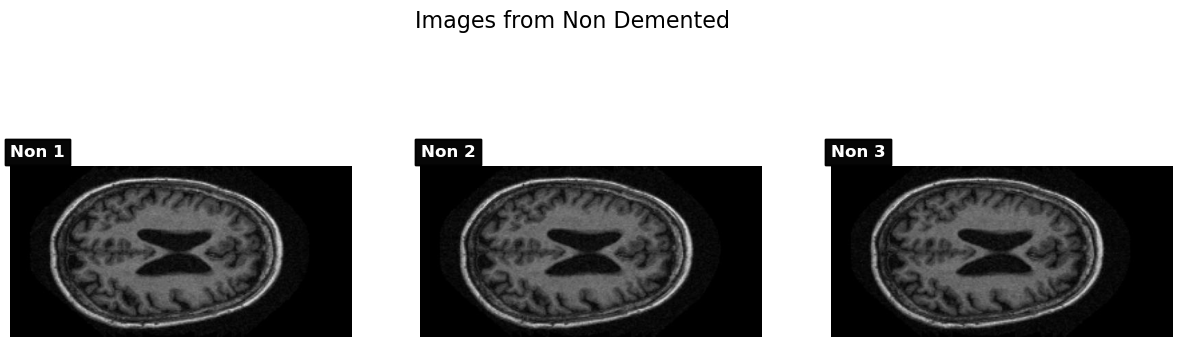

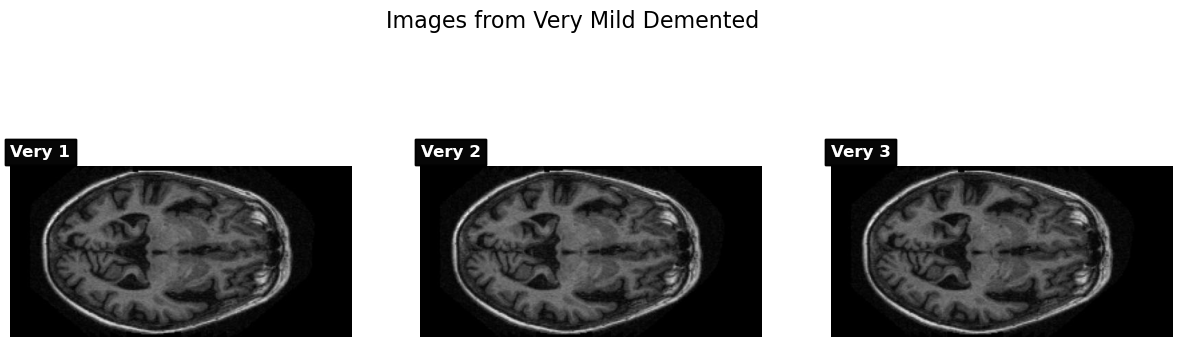

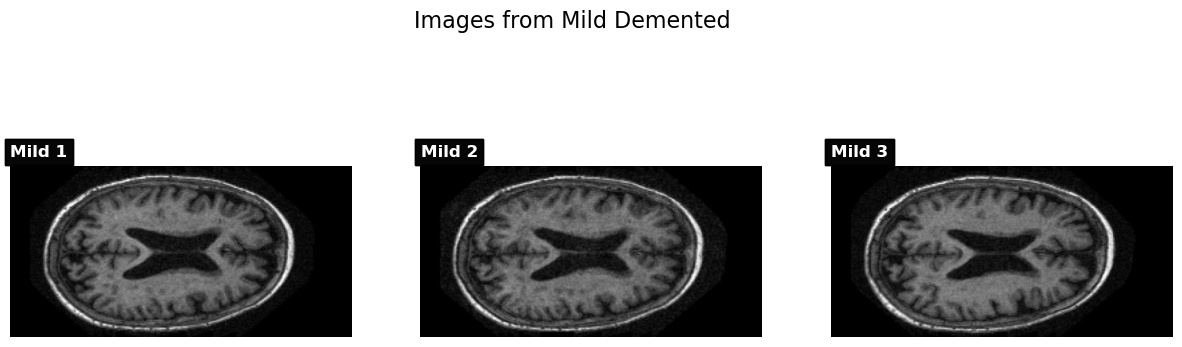

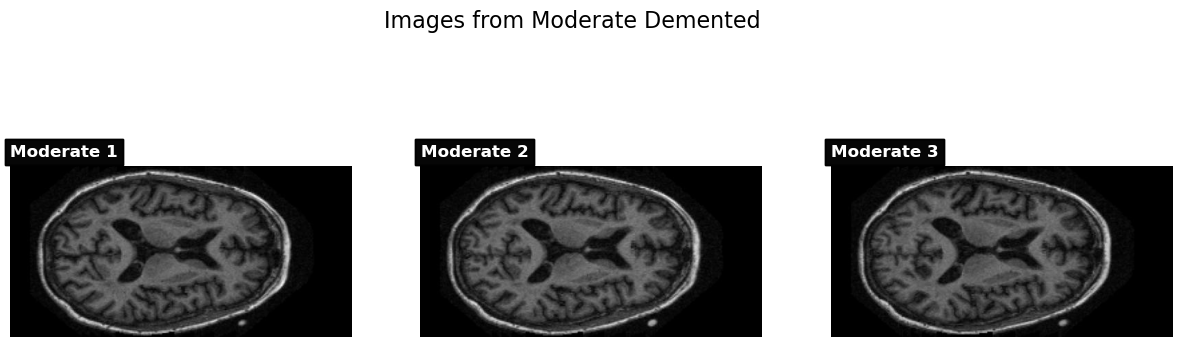

In [5]:
# Function to display images with text indicating the category
def display_images_with_text(file_paths, category_name, endings=['150', '151', '152']):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Images from {category_name}", fontsize=16)

    for ending in endings:
        matching_files = [img for img in file_paths if img.endswith(ending + '.jpg')]
        for i in range(min(3, len(matching_files))):
            img_path = matching_files[i]
            img = Image.open(img_path)
            plt.subplot(1, 3, i + 1)
            plt.imshow(img)
            plt.axis('off')
            
            # Add text indicating the category
            plt.text(0, -10, f"{category_name.split()[0]} {i + 1}", color='white', fontsize=12, weight='bold', ha='left', va='bottom', bbox=dict(facecolor='black', alpha=0.7))

    plt.show()

# Display images with text for each category
display_images_with_text(non_demented, "Non Demented")
display_images_with_text(very_mild_demented, "Very Mild Demented")
display_images_with_text(mild_demented, "Mild Demented")
display_images_with_text(moderate_demented, "Moderate Demented")

In [6]:
import random
from sklearn.model_selection import train_test_split
# Set seed for random sampling
random.seed(42)


# Split off a test set for the moderate_demented class
moderate_demented_train, moderate_demented_test = train_test_split(
    moderate_demented, test_size=0.2, random_state=42
)

# Split off a test set for the mild_demented class
mild_demented_train, mild_demented_test = train_test_split(
    mild_demented, test_size=0.2, random_state=42
)

# Split off a test set for the very_mild_demented class
very_mild_demented_train, very_mild_demented_test = train_test_split(
    very_mild_demented, test_size=0.2, random_state=42
)

# Split off a test set for the non_demented class
non_demented_train, non_demented_test = train_test_split(
    non_demented, test_size=0.2, random_state=42
)

In [7]:
# Specify the target number of samples for each class
target_samples = 5000

# Oversample small classes
moderate_demented_samp = random.choices(moderate_demented_train, k=target_samples)
mild_demented_samp = random.choices(mild_demented_train, k=target_samples)

# Undersample large classes
very_mild_demented_samp = random.sample(very_mild_demented_train, k=target_samples)
non_demented_samp = random.sample(non_demented_train, k=target_samples)

In [8]:
# How many samples in each category: 
print(len(non_demented))
print(len(very_mild_demented))
print(len(mild_demented))
print(len(moderate_demented))

67222
13725
5002
488


In [9]:
# Check results
print(len(non_demented_samp))
print(len(very_mild_demented_samp))
print(len(mild_demented_samp))
print(len(moderate_demented_samp))

5000
5000
5000
5000


In [10]:
# Check the number of test images per category
print(len(non_demented_test))
print(len(very_mild_demented_test))
print(len(mild_demented_test))
print(len(moderate_demented_test))

13445
2745
1001
98


In [11]:
# Specify the target number of samples for each class
target_samples = 640

# Undersample large classes
mild_demented_test = random.sample(mild_demented_test, k=target_samples)
very_mild_demented_test = random.sample(very_mild_demented_test, k=target_samples)
non_demented_test = random.sample(non_demented_test, k=target_samples)

In [12]:
# Check results
print(len(non_demented_test))
print(len(very_mild_demented_test))
print(len(mild_demented_test))
print(len(moderate_demented_test))

640
640
640
98


In [13]:
# One-hot encoder for class labels 
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [14]:
# Empty objects to store the data and the class labels (result) in
data = []
result = []

# Loop through each category and transform data and result into right format (128x128x3 & one-hot encoded) 
# and merge categories together
for path in non_demented_samp:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        # Apply Gaussian filter
        #img_filtered = gaussian_filter(img, sigma=1)
        # Apply histogram equalization
        #img_equalized = cv2.equalizeHist(img_filtered[:,:,0])  # Apply only on one channel (e.g., grayscale)
        #img_processed = np.stack((img_equalized,)*3, axis=-1)  # Convert back to 3-channel image
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for path in very_mild_demented_samp:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        # Apply Gaussian filter
        #img_filtered = gaussian_filter(img, sigma=1)
        # Apply histogram equalization
        #img_equalized = cv2.equalizeHist(img_filtered[:,:,0])  # Apply only on one channel (e.g., grayscale)
        #img_processed = np.stack((img_equalized,)*3, axis=-1)  # Convert back to 3-channel image
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
        
for path in mild_demented_samp:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        # Apply Gaussian filter
        #img_filtered = gaussian_filter(img, sigma=1)
        # Apply histogram equalization
        #img_equalized = cv2.equalizeHist(img_filtered[:,:,0])  # Apply only on one channel (e.g., grayscale)
        #img_processed = np.stack((img_equalized,)*3, axis=-1)  # Convert back to 3-channel image
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray()) 
        
for path in moderate_demented_samp:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        # Apply Gaussian filter
        #img_filtered = gaussian_filter(img, sigma=1)
        # Apply histogram equalization
        #img_equalized = cv2.equalizeHist(img_filtered[:,:,0])  # Apply only on one channel (e.g., grayscale)
        #img_processed = np.stack((img_equalized,)*3, axis=-1)  # Convert back to 3-channel image
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())


In [15]:
# Transform data to numpy array
data = np.array(data)

# Check shape
data.shape

(20000, 128, 128, 3)

In [16]:
# Transform labels to numpy array
result = np.array(result)

# Reshape to the one-hot encoded format 
result = result.reshape((data.shape[0],4)) 

# Check shape 
result.shape

(20000, 4)

In [17]:
# Split in validation and train data 
x_train,x_val,y_train,y_val = train_test_split(data,result, test_size=0.20, shuffle=True, random_state=42)

In [18]:
### Transforming the data into the right shape (128x128x3), merge and encode it 

data_test = []
result_test = []

for path in non_demented_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[0]]).toarray())
        
for path in very_mild_demented_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[1]]).toarray())
        
for path in mild_demented_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[2]]).toarray()) 
        
for path in moderate_demented_test:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data_test.append(np.array(img))
        result_test.append(encoder.transform([[3]]).toarray())

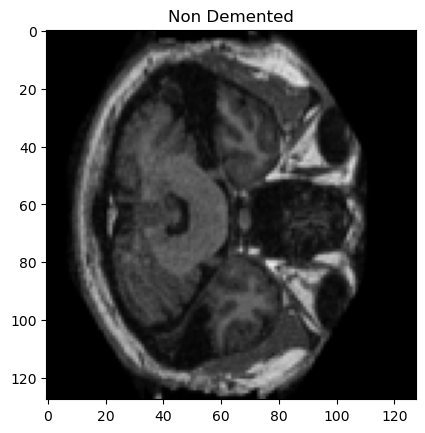

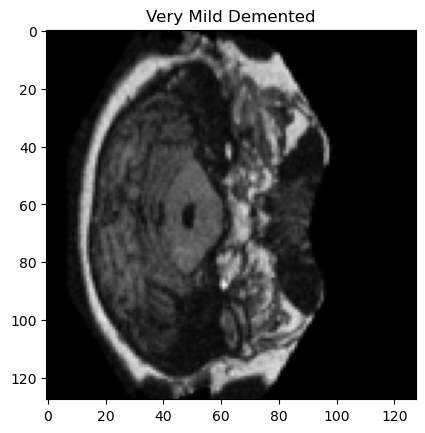

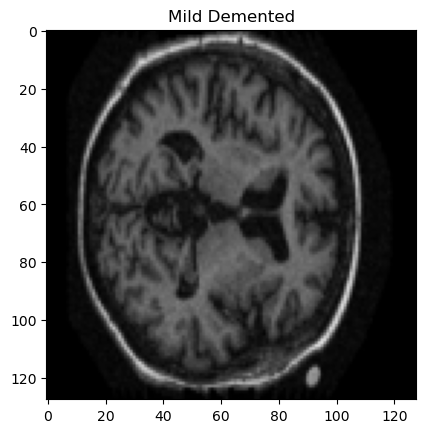

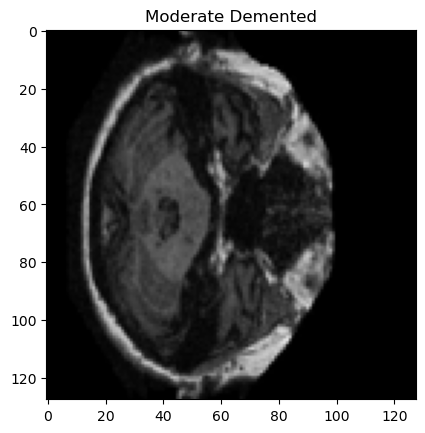

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to print a resized image from each class
def print_resized_image_from_each_class(data, result, encoder):
    # Define class labels
    classes = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']
    
    # Concatenate all the one-hot encoded arrays into one 2D array
    result_array = np.concatenate(result)
    
    # Initialize a list to keep track of whether an image has been printed for each class
    image_printed = [False] * len(classes)
    
    # Loop through the data and result arrays
    for img, res in zip(data, result_array):
        # Decode the one-hot encoded label
        label = np.argmax(res) + 1
        
        # Get the index of the class
        class_index = label - 1  # Subtract 1 to account for 0-based indexing
        
        # Check if an image has been printed for this class
        if not image_printed[class_index]:
            # Plot the image
            plt.imshow(img)
            plt.title(classes[class_index])
            plt.show()
            
            # Mark that an image has been printed for this class
            image_printed[class_index] = True

# Call the function with your data_test, result_test, and encoder variables
print_resized_image_from_each_class(data_test, result_test, encoder)


In [20]:
# Transform data to numpy array
data_test = np.array(data_test)
data_test.shape

(2018, 128, 128, 3)

In [21]:
# Transform labels to numpy array
result_test = np.array(result_test)
result_test = result_test.reshape((data_test.shape[0],4)) 
result_test.shape

(2018, 4)

In [22]:
x_test = data_test
y_test = result_test

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Dropout, Reshape
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV

# Function to create model
def create_model(learning_rate=0.0001, lstm_units=64, dropout_rate=0.5):
    # Load pre-trained VGG16 model
    vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the layers of VGGNet
    for layer in vgg_base_model.layers:
        layer.trainable = False

    # Flatten the output of VGGNet
    flatten_layer = Flatten()(vgg_base_model.output)

    # Reshape to add the time dimension (timesteps)
    reshape_layer = Reshape((-1, flatten_layer.shape[-1]))(flatten_layer)

    # LSTM layer
    lstm_layer = LSTM(lstm_units)(reshape_layer)

    # Dense layers
    dense_layer_1 = Dense(64, activation='relu')(lstm_layer)
    dropout_layer = Dropout(dropout_rate)(dense_layer_1)
    output_layer = Dense(4, activation='softmax')(dropout_layer)  # Output layer with 4 neurons for classification

    # Create model
    model = Model(inputs=vgg_base_model.input, outputs=output_layer)

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Create the model
model = create_model()

model.summary()


58889256/58889256 [==============================] - 28s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                             

In [25]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
500/500 [==============================] - 69s 137ms/step - loss: 0.3273 - accuracy: 0.8933 - val_loss: 0.2722 - val_accuracy: 0.9097
Epoch 2/10
500/500 [==============================] - 68s 136ms/step - loss: 0.2405 - accuracy: 0.9244 - val_loss: 0.2022 - val_accuracy: 0.9268
Epoch 3/10
500/500 [==============================] - 68s 137ms/step - loss: 0.1767 - accuracy: 0.9477 - val_loss: 0.1660 - val_accuracy: 0.9433
Epoch 4/10
500/500 [==============================] - 68s 137ms/step - loss: 0.1330 - accuracy: 0.9607 - val_loss: 0.1560 - val_accuracy: 0.9430
Epoch 5/10
500/500 [==============================] - 68s 137ms/step - loss: 0.1005 - accuracy: 0.9716 - val_loss: 0.1145 - val_accuracy: 0.9597
Epoch 6/10
500/500 [==============================] - 68s 137ms/step - loss: 0.0758 - accuracy: 0.9804 - val_loss: 0.1185 - val_accuracy: 0.9592
Epoch 7/10
500/500 [==============================] - 68s 137ms/step - loss: 0.0640 - accuracy: 0.9843 - val_loss: 0.0951 - val_ac

In [26]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

64/64 [==============================] - 8s 112ms/step - loss: 0.1240 - accuracy: 0.9554
Test Loss: 0.12395663559436798
Test Accuracy: 0.9554013609886169


In [28]:
# Save the model to HDF5 file
model.save("C:/Project-Main/my_model")

INFO:tensorflow:Assets written to: C:/Project-Main/my_model\assets


INFO:tensorflow:Assets written to: C:/Project-Main/my_model\assets
